## Basic Vanilla network 

* MaxPooling at the right layer
* (1x1x10) before Flatten layer
* Small batch size(32) and few epochs(15)
* Activation function -  Adam 

Parameters - **16,930**
Accuracy -  **99.05**

In [0]:
# Import the necessary packages

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing necessary modules from the library 
import numpy as np

from keras.models import Sequential #Sequential model is a linear stack of layers.
from keras.layers import Dense, Dropout, Activation, Flatten, Add 
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # split the dataset into testing and training samples

(60000, 28, 28)


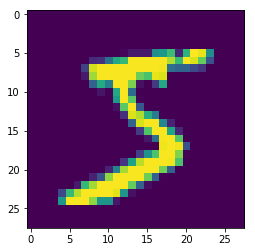

In [0]:
print (X_train.shape) 
from matplotlib import pyplot as plt # Matplotlib is a Python 2D plotting library. 
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Changing the size of array to include channel information

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 # making values 0 to 1 , normalising it so while multiplying value doesn't increase

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


 #8 convolution filters of size 3x3
model.add(Convolution2D(10, 3, 3,activation ='relu', input_shape=(28,28,1)))  #Output image : 26x26x8 , RF: 3x3


model.add(Convolution2D(16, 3, 3,activation ='relu')) #24x24x12 , RF: 5x5


model.add(Convolution2D(18, 3, 3,activation ='relu')) #22x22x16 , RF: 7x7

model.add(MaxPooling2D(2)) #11x11x16 , RF: 14x14

model.add(Convolution2D(20, 3, 3,activation ='relu')) #9x9x20, RF: 16x16


model.add(Convolution2D(24, 3, 3,activation ='relu')) #7x7x24 , RF: 18x18


model.add(Convolution2D(10, 1)) #7x7x10 , RF:18x18

model.add(Convolution2D(10, 7))#1x1x10, RF:28x28
model.add(Flatten()) #Converts input shape (1,1,10) to 1D of 10
model.add(Activation('softmax'))  # input to Softmax is 10X1

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 18)        2610      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 18)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 20)          3260      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 24)          4344      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 10)          250       
__________

In [0]:
# Configure the learning process, using the compile method.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1) # Train the model, iterating on the data in batches of 32 samples for 10 epochs

Epoch 1/15
   32/60000 [..............................] - ETA: 3:54 - loss: 0.0111 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 218s 4ms/step - loss: 0.0175 - acc: 0.9941
Epoch 2/15
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0149 - acc: 0.9952
Epoch 3/15
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0140 - acc: 0.9954
Epoch 4/15
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0150 - acc: 0.9952
Epoch 5/15
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0098 - acc: 0.9967
Epoch 6/15
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0100 - acc: 0.9968
Epoch 7/15
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0098 - acc: 0.9968
Epoch 8/15
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0100 - acc: 0.9966
Epoch 9/15
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0091 - acc: 0.9970
Epoch 10/15
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0083 - acc: 0.9972


In [0]:
# Score is the evaluation of the loss function for a given input.
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 14s 1ms/step


In [0]:
print(score)  # [Loss/Cross Entropy Value, Accuracy]

[0.06274954557233234, 0.9905]
